# 15. AMES HOUSING: FEATURE ENGINEERING
---

The goal of this chapter is to:
- deal with missing values
- create new features
- scale numerical features
- encode categorical features
- create a preprocessing pipeline ready for model testing

## 1. Introducing the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

ames = pd.read_csv('data/Ames_Housing1_train')
print(ames.shape)
ames.head()

(2344, 80)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,80.0,10400.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1090.0,1090.0,GasA,TA,Y,SBrkr,1370.0,0.0,0.0,1370.0,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,479.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,6,2009,WD,Family,152000.0
1,60,RL,NaN,28698.0,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,2Story,5,5,1967,1967,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,PConc,TA,Gd,Gd,LwQ,249.0,ALQ,764.0,0.0,1013.0,GasA,TA,Y,SBrkr,1160.0,966.0,0.0,2126.0,0.0,1.0,2,1,3,1,TA,7,Min2,0,NaN,Attchd,1967.0,Fin,2.0,538.0,TA,TA,Y,486.0,0.0,0.0,0.0,225.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Abnorml,185000.0
2,90,RL,70.0,9842.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1224.0,0.0,0.0,1224.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2.0,462.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3,2007,WD,Normal,101800.0
3,90,RL,60.0,7200.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseF,1040.0,0.0,0.0,1040.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1956.0,Unf,2.0,420.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Normal,90000.0
4,190,RM,63.0,7627.0,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,2fmCon,2Story,4,6,1920,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,TA,BrkTil,Fa,Po,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Gd,N,SBrkr,1101.0,600.0,0.0,1701.0,0.0,0.0,2,0,4,2,Fa,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0.0,0.0,148.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,10,2009,WD,Normal,94550.0


## 2. Missing Values

In [2]:
ames_null_counts = ames.isnull().sum()
ames_null = ames[ames_null_counts[ames_null_counts!=0].index]
null_only = ames_null.isnull().sum().sort_values()
null_only

Total Bsmt SF        1
Garage Area          1
Bsmt Half Bath       1
Bsmt Full Bath       1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mas Vnr Area        19
Mas Vnr Type        19
Bsmt Cond           61
Bsmt Qual           61
BsmtFin Type 1      61
BsmtFin Type 2      62
Bsmt Exposure       63
Garage Type        120
Garage Finish      122
Garage Qual        122
Garage Cond        122
Garage Yr Blt      122
Lot Frontage       393
Fireplace Qu      1144
Fence             1874
Alley             2182
Misc Feature      2250
Pool QC           2332
dtype: int64

Text(0.5, 0, 'Features')

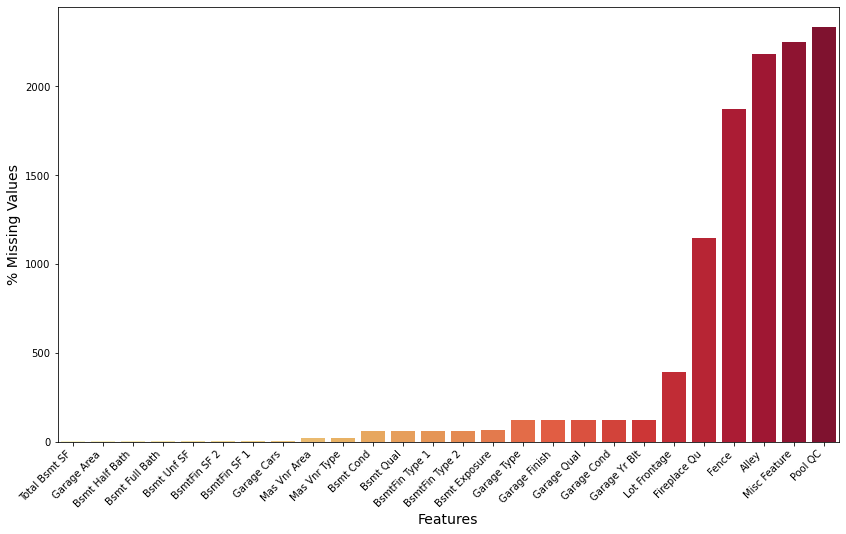

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

null_plot = pd.DataFrame()
null_plot['feature'] = null_only.index
null_plot['% missing'] = null_only.values

plt.figure(figsize=(14,8))
ax = sns.barplot(x='feature', y='% missing', 
                 data=null_plot, palette='YlOrRd')
plt.xticks(rotation=45, ha='right')
plt.ylabel('% Missing Values', size=14)
plt.xlabel('Features', size=14)